In [1]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input

import numpy as np

from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) =mnist.load_data()
X_train.shape, y_train.shape

2023-04-22 12:55:14.952781: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


((60000, 28, 28), (60000,))

In [3]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1]*X_train.shape[2],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

X_train_tran = X_train.reshape(-1, 28*28)
y_train_tran = to_categorical(y_train)



In [5]:

opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt,
              loss=loss,
              metrics=metrics)

model.fit(X_train_tran, y_train_tran, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 2s 19ms/step - loss: 7.6342 - accuracy: 0.7768
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 1.4337 - accuracy: 0.8964
Epoch 3/10
60/60 [==============================] - 1s 19ms/step - loss: 0.8751 - accuracy: 0.9199
Epoch 4/10
60/60 [==============================] - 1s 16ms/step - loss: 0.6014 - accuracy: 0.9325
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.4502 - accuracy: 0.9421
Epoch 6/10
60/60 [==============================] - 1s 13ms/step - loss: 0.3357 - accuracy: 0.9517
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.2599 - accuracy: 0.9577
Epoch 8/10
60/60 [==============================] - 1s 15ms/step - loss: 0.2077 - accuracy: 0.9632
Epoch 9/10
60/60 [==============================] - 1s 11ms/step - loss: 0.1695 - accuracy: 0.9680
Epoch 10/10
60/60 [==============================] - 0s 8ms/step - loss: 0.1412 - accuracy: 0.9714


In [8]:
# predict

np.argmax(model.predict(X_train[[0]].reshape(1,784)))

first = []

for i in range(10):
    first.append(np.argmax(model.predict(X_train[[i]].reshape(1,784))))


1/1 [==============================] - 0s 64ms/step


[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

In [9]:
from keras.datasets import cifar10


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape, y_train.shape

170498071/170498071 [==============================] - 314s 2us/step


((50000, 32, 32, 3), (50000, 1))

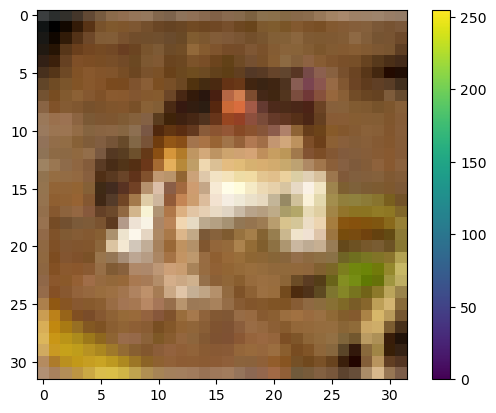

In [10]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
def one_hot(x):
    len = np.unique(x).size()
    for v in x:
        tmp = np.zeros(len)
        tmp[v] = 1


In [13]:
X_train_tran = X_train.reshape(-1, np.cumprod(X_train.shape[1:])[-1])
y_train_tran = to_categorical(y_train)

model = Sequential([
    Dense(2048, activation='relu', input_shape=(X_train_tran.shape[1:])),
    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dense(y_train_tran.shape[-1], activation='softmax')
])

In [15]:
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt,
              loss=loss,
              metrics=metrics)

model.fit(X_train_tran, y_train_tran, epochs=10, batch_size=500)

Epoch 1/10
100/100 [==============================] - 13s 126ms/step - loss: 2.4051 - accuracy: 0.2693
Epoch 2/10
100/100 [==============================] - 12s 123ms/step - loss: 1.8420 - accuracy: 0.3321
Epoch 3/10
100/100 [==============================] - 13s 128ms/step - loss: 1.7860 - accuracy: 0.3488
Epoch 4/10
100/100 [==============================] - 12s 124ms/step - loss: 1.7757 - accuracy: 0.3586
Epoch 5/10
100/100 [==============================] - 13s 125ms/step - loss: 1.7400 - accuracy: 0.3699
Epoch 6/10
100/100 [==============================] - 12s 123ms/step - loss: 1.6917 - accuracy: 0.3911
Epoch 7/10
100/100 [==============================] - 13s 128ms/step - loss: 1.6828 - accuracy: 0.3959
Epoch 8/10
100/100 [==============================] - 13s 128ms/step - loss: 1.6717 - accuracy: 0.3975
Epoch 9/10
100/100 [==============================] - 13s 126ms/step - loss: 1.6354 - accuracy: 0.4121
Epoch 10/10
100/100 [==============================] - 12s 125ms/step - l

In [18]:
from keras.layers import BatchNormalization, Dropout



In [19]:
# layer1 = Dense(2048, activation='relu', input_shape=(X_train_tran.shape[1:])),
# layer2 = Dense(1024, activation='relu'),
# layer3 = Dense(256, activation='relu'),
# layer4 = Dense(y_train_tran.shape[-1], activation='softmax')
# batch_layer = BatchNormalization()

model1 = Sequential([
    Dense(2048, activation='relu', input_shape=(X_train_tran.shape[1:])),
    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dense(y_train_tran.shape[-1], activation='softmax')
])

model2 = Sequential([
    Dense(2048, activation='relu', input_shape=(X_train_tran.shape[1:])),
    BatchNormalization(),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(y_train_tran.shape[-1], activation='softmax')
])

model1.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 2048)              6293504   
                                                                 
 dense_23 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_24 (Dense)            (None, 256)               262400    
                                                                 
 dense_25 (Dense)            (None, 10)                2570      
                                                                 
Total params: 8,656,650
Trainable params: 8,656,650
Non-trainable params: 0
_________________________________________________________________


In [25]:
#모델 첫 weights 값을 같게 함.
model2.layers[0].set_weights(model1.layers[0].get_weights())
model2.layers[2].set_weights(model1.layers[1].get_weights())
model2.layers[4].set_weights(model1.layers[2].get_weights())
model2.layers[6].set_weights(model1.layers[3].get_weights())

X_test_tran = X_test.reshape(-1, np.cumprod(X_test.shape[1:])[-1])
y_test_tran = to_categorical(y_test)


In [26]:
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model1.compile(optimizer=opt,
              loss=loss,
              metrics=metrics)

model2.compile(optimizer=opt,
              loss=loss,
              metrics=metrics)

model1.fit(X_train_tran, y_train_tran, epochs=10, batch_size=500, validation_data=(X_test_tran, y_test_tran))
model2.fit(X_train_tran, y_train_tran, epochs=10, batch_size=500, validation_data=(X_test_tran, y_test_tran))

Epoch 1/10
100/100 [==============================] - 12s 115ms/step - loss: 1.6059 - accuracy: 0.4204 - val_loss: 1.6161 - val_accuracy: 0.4182
Epoch 2/10
100/100 [==============================] - 11s 114ms/step - loss: 1.5854 - accuracy: 0.4272 - val_loss: 1.6007 - val_accuracy: 0.4301
Epoch 3/10
100/100 [==============================] - 12s 123ms/step - loss: 1.5738 - accuracy: 0.4327 - val_loss: 1.5984 - val_accuracy: 0.4277
Epoch 4/10
100/100 [==============================] - 12s 118ms/step - loss: 1.5663 - accuracy: 0.4348 - val_loss: 1.5967 - val_accuracy: 0.4279
Epoch 5/10
100/100 [==============================] - 12s 117ms/step - loss: 1.5586 - accuracy: 0.4390 - val_loss: 1.6006 - val_accuracy: 0.4323
Epoch 6/10
100/100 [==============================] - 12s 118ms/step - loss: 1.5452 - accuracy: 0.4447 - val_loss: 1.5962 - val_accuracy: 0.4229
Epoch 7/10
100/100 [==============================] - 12s 118ms/step - loss: 1.5402 - accuracy: 0.4453 - val_loss: 1.5842 - val_ac

In [27]:
model1.evaluate(X_test_tran, y_test_tran)

313/313 [==============================] - 4s 14ms/step - loss: 1.5797 - accuracy: 0.4341


[1.5796546936035156, 0.4341000020503998]

In [28]:
model2.evaluate(X_test_tran, y_test_tran)

313/313 [==============================] - 4s 13ms/step - loss: 1.6712 - accuracy: 0.4414


[1.6712371110916138, 0.4413999915122986]

In [31]:
model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(2048, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(y_train_tran.shape[-1], activation='softmax')
])

model.compile(optimizer=opt,
              loss=loss,
              metrics=metrics)

model.fit(X_train, y_train_tran, epochs=1, batch_size=1000, validation_data=(X_test, y_test_tran))

50/50 [==============================] - 10s 187ms/step - loss: 130.8763 - accuracy: 0.1013 - val_loss: 2.3026 - val_accuracy: 0.1000


In [ ]:
def min_max(x):
    r = max(x) - min(x)
    m = min(x)

    return (x-m)/r


In [35]:
#CNN
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical, pad_sequences



In [70]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential([
    Conv2D(30, (3,3), activation='relu', input_shape=X_train.shape[1:]),
    BatchNormalization(),
    MaxPooling2D((3,3)),
    Conv2D(50, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(y_train.shape[1], activation='softmax')
])

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 30, 30, 30)        840       
                                                                 
 batch_normalization_12 (Bat  (None, 30, 30, 30)       120       
 chNormalization)                                                
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 10, 10, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 50)          13550     
                                                                 
 batch_normalization_13 (Bat  (None, 8, 8, 50)         200       
 chNormalization)                                                
                                                     

In [72]:
opt = 'rmsprop'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt,
              loss=loss,
              metrics=metrics)
# y_train.shape
model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/10
98/98 [==============================] - 17s 165ms/step - loss: 1.6225 - accuracy: 0.4342 - val_loss: 2.1045 - val_accuracy: 0.3774
Epoch 2/10
98/98 [==============================] - 17s 168ms/step - loss: 1.2323 - accuracy: 0.5677 - val_loss: 1.3638 - val_accuracy: 0.5277
Epoch 3/10
98/98 [==============================] - 17s 171ms/step - loss: 1.0916 - accuracy: 0.6205 - val_loss: 1.2573 - val_accuracy: 0.5638
Epoch 4/10
98/98 [==============================] - 16s 167ms/step - loss: 1.0007 - accuracy: 0.6521 - val_loss: 1.3102 - val_accuracy: 0.5650
Epoch 5/10
98/98 [==============================] - 17s 170ms/step - loss: 0.9295 - accuracy: 0.6768 - val_loss: 1.1815 - val_accuracy: 0.5986
Epoch 6/10
98/98 [==============================] - 17s 172ms/step - loss: 0.8764 - accuracy: 0.6969 - val_loss: 1.0502 - val_accuracy: 0.6375
Epoch 7/10
98/98 [==============================] - 17s 177ms/step - loss: 0.8288 - accuracy: 0.7154 - val_loss: 1.0848 - val_accuracy: 0.6250

In [79]:
for i, v in enumerate(y_train):
    if v[6] == 1:
        pre = np.argmax(model.predict(X_train[[i]]))
        real = np.argmax(y_train[i])
        print("real val : {}  pre val : {}".format(real, pre))


plt.imshow(X_train[19])

1/1 [==============================] - 0s 55ms/step
real val : 6  pre val : 6
1/1 [==============================] - 0s 38ms/step
real val : 6  pre val : 6
1/1 [==============================] - 0s 76ms/step
real val : 6  pre val : 6
1/1 [==============================] - 0s 55ms/step
real val : 6  pre val : 6
1/1 [==============================] - 0s 49ms/step
real val : 6  pre val : 6
1/1 [==============================] - 0s 42ms/step
real val : 6  pre val : 6
1/1 [==============================] - 0s 18ms/step
real val : 6  pre val : 6
1/1 [==============================] - 0s 18ms/step
real val : 6  pre val : 6
1/1 [==============================] - 0s 17ms/step
real val : 6  pre val : 6
1/1 [==============================] - 0s 15ms/step
real val : 6  pre val : 6
1/1 [==============================] - 0s 20ms/step
real val : 6  pre val : 6
1/1 [==============================] - 0s 25ms/step
real val : 6  pre val : 6
1/1 [==============================] - 0s 28ms/step
real val : 6

KeyboardInterrupt: 

In [37]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 30)       0         
 )                                                               
                                                                 
Total params: 840
Trainable params: 840
Non-trainable params: 0
_________________________________________________________________


In [54]:
x = np.arange(1,17).reshape(4,4)
kernel = np.arange(1,5).reshape(2,2)
result = np.zeros((3,3))
result[0,0] = np.sum(x[:2,:2] * kernel)
result[0,1] = np.sum(x[:2,1:3] * kernel)
result[0,2] = np.sum(x[:2,2:4] * kernel)

result[1,0] = np.sum(x[1:3,:2] * kernel)
result[1,1] = np.sum(x[1:3,1:3] * kernel)
result[1,2] = np.sum(x[1:3,2:4] * kernel)

result[2,0] = np.sum(x[2:4,:2] * kernel)
result[2,1] = np.sum(x[2:4,1:3] * kernel)
result[2,2] = np.sum(x[2:4,2:4] * kernel)

model = Sequential([
    Conv2D(1, (2,2),input_shape=(4,4,1)),
    MaxPooling2D((2,2)),

])
# np.dot(np.arange(1,17).reshape(1,4,4,1), model.layers[0].get_weights()[0]).shape


In [ ]:
opt = 'rmsprop'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt,
              loss=loss,
              metrics=metrics)

model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_test, y_test))

In [56]:
x = model.predict(X_train[0])

ValueError: in user code:

    File "/home/nextchoice/anaconda3/envs/deep/lib/python3.10/site-packages/keras/engine/training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "/home/nextchoice/anaconda3/envs/deep/lib/python3.10/site-packages/keras/engine/training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/nextchoice/anaconda3/envs/deep/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "/home/nextchoice/anaconda3/envs/deep/lib/python3.10/site-packages/keras/engine/training.py", line 2079, in predict_step
        return self(x, training=False)
    File "/home/nextchoice/anaconda3/envs/deep/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/nextchoice/anaconda3/envs/deep/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_15" is incompatible with the layer: expected shape=(None, 4, 4, 1), found shape=(32, 32, 3)
